In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [3]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
57395,00014240_000.png,Infiltration,0,14240,37,M,PA,2992,2991,0.143,0.143,NaN
102829,00027415_062.png,Infiltration,62,27415,23,M,AP,3056,2544,0.139,0.139,NaN
90654,00022572_036.png,Infiltration,36,22572,49,M,AP,3056,2544,0.139,0.139,NaN


In [4]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5230,00028043_000.png,No Finding,0,28043,045Y,F,PA,2992,2991,0.143000,0.143000
5484,00029867_000.png,Infiltration,0,29867,050Y,F,PA,2021,2020,0.194311,0.194311
1061,00005532_024.png,Cardiomegaly|Effusion|Infiltration,24,5532,041Y,F,AP,3056,2544,0.139000,0.139000


# 1. The patient demographic data such as gender, age, patient position,etc. (as it is available)

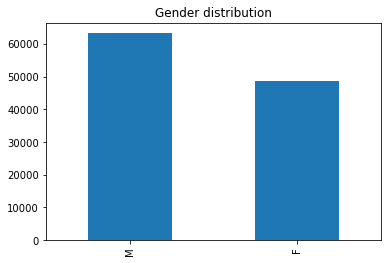

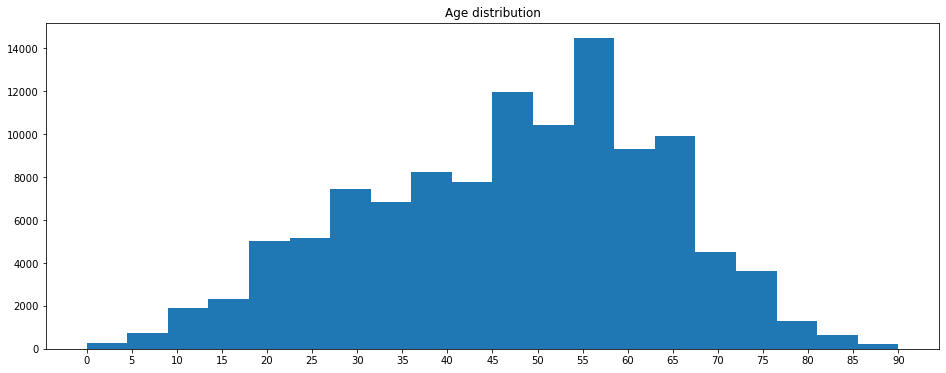

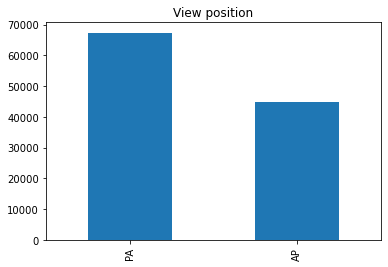

In [5]:
## EDA
# Todo 

plt.figure()
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')
plt.title('Gender distribution')

plt.figure(figsize=(16,6))
plt.hist(all_xray_df['Patient Age'], bins=20, range=(0,90))
# all_xray_df['Patient Age'].value_counts().plot(kind='bar')
plt.title('Age distribution')
plt.xticks(np.arange(0, 91, step=5))  # Set label locations.
plt.show()

plt.figure()
all_xray_df['View Position'].value_counts().plot(kind='bar')
plt.title('View position')
plt.show()


In [28]:
all_xray_df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


## Demographic distribution of findings

In [6]:
all_diseases = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_diseases = [x for x in all_diseases if x != 'No Finding']
print('All Diseases ({}): {}'.format(len(all_diseases), all_diseases))

for i in all_diseases:
    if len(i)>1: 
        all_xray_df[i] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if i in finding else 0)
all_xray_df.sample(3)

All Diseases (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
41781,00010775_011.png,Atelectasis|Effusion|Infiltration|Pneumothorax,11,10775,36,F,PA,2048,2500,0.168000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
82446,00020286_015.png,Pneumothorax,15,20286,66,F,PA,2021,2021,0.194311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20942,00005593_005.png,No Finding,5,5593,42,F,AP,2500,2048,0.171000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Distribution by Gender

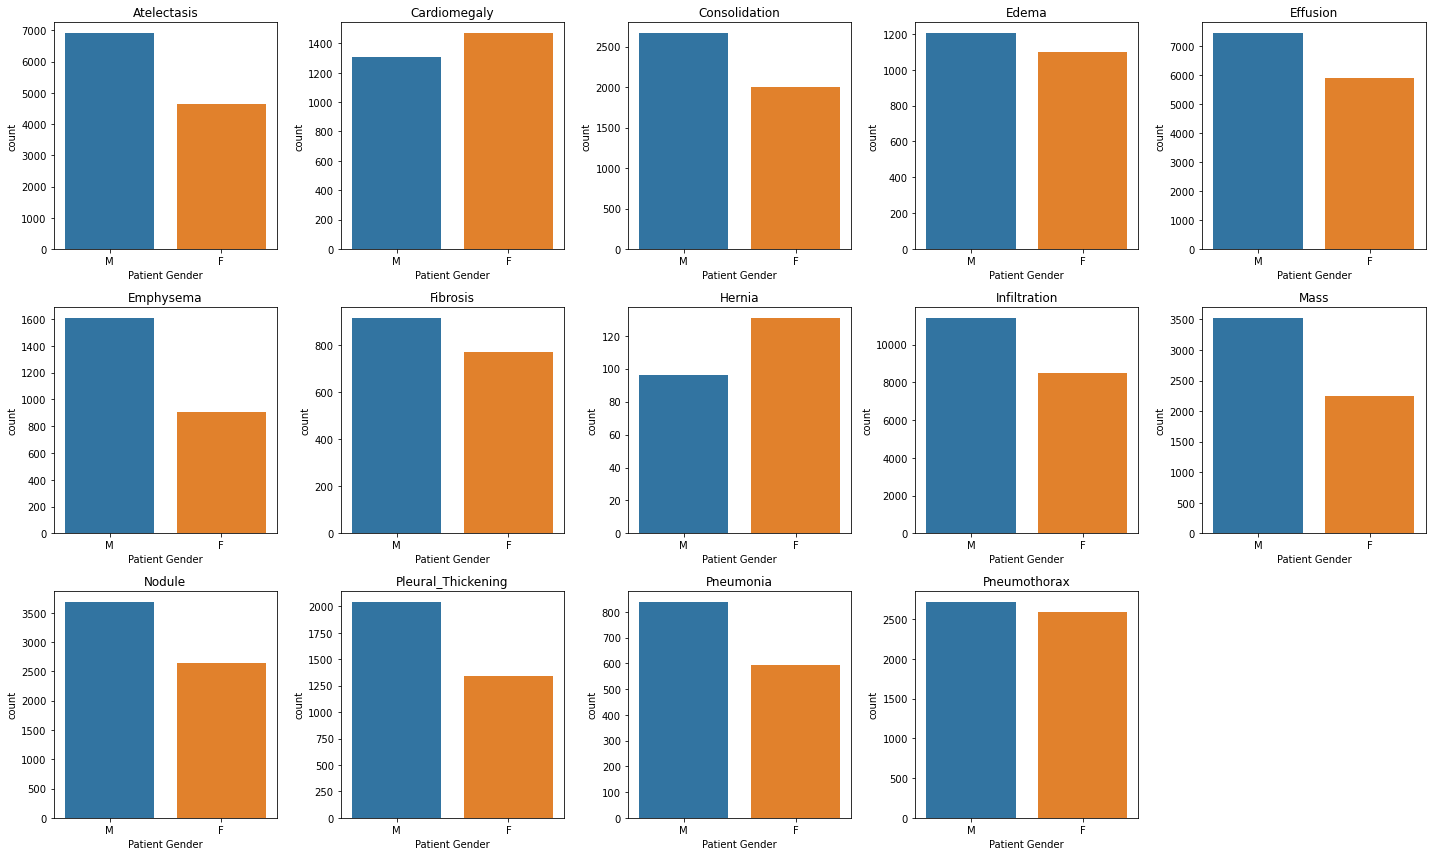

In [7]:
fig = plt.subplots(figsize=(20,12))
for i, disease in enumerate(all_diseases):
    plt.subplot(3, 5, i+1)
    ax = sns.countplot(x='Patient Gender',data = all_xray_df[all_xray_df[disease] == 1], order=['M', 'F'])
    plt.title(disease)
    plt.subplots_adjust(hspace=1.0)
    plt.tight_layout()

More males affected by pneumonia than females. 

### Distribution by Age

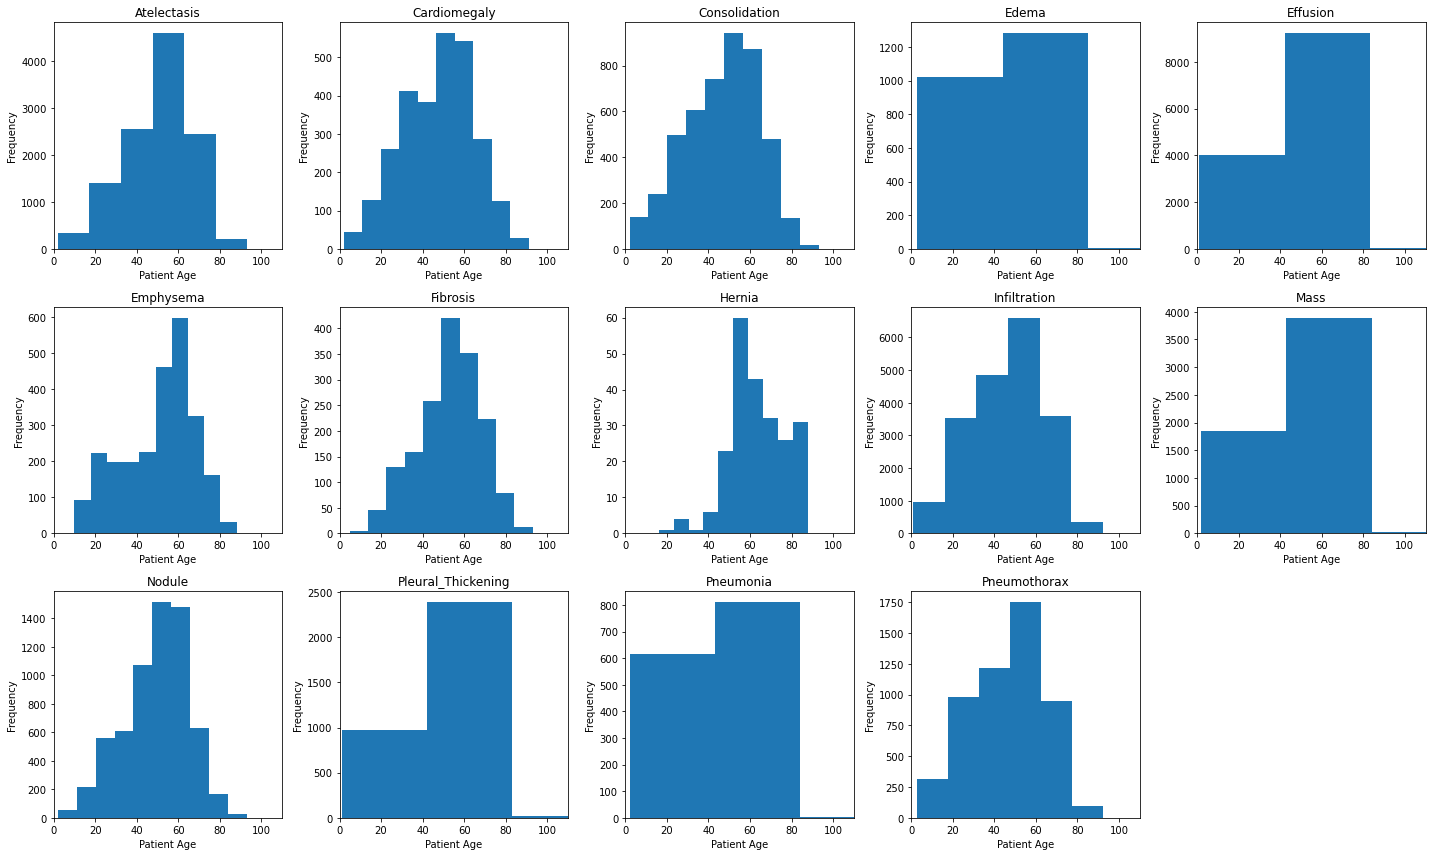

In [8]:
fig = plt.subplots(figsize=(20,12))
for i, disease in enumerate(all_diseases):
    plt.subplot(3, 5, i+1)
    plt.hist(all_xray_df[all_xray_df[disease]==1]['Patient Age'])
    plt.xlabel('Patient Age')
    plt.ylabel('Frequency')
    plt.title(disease)
    plt.subplots_adjust(hspace=1.0)
    plt.tight_layout()
    plt.xlim(0, 110)

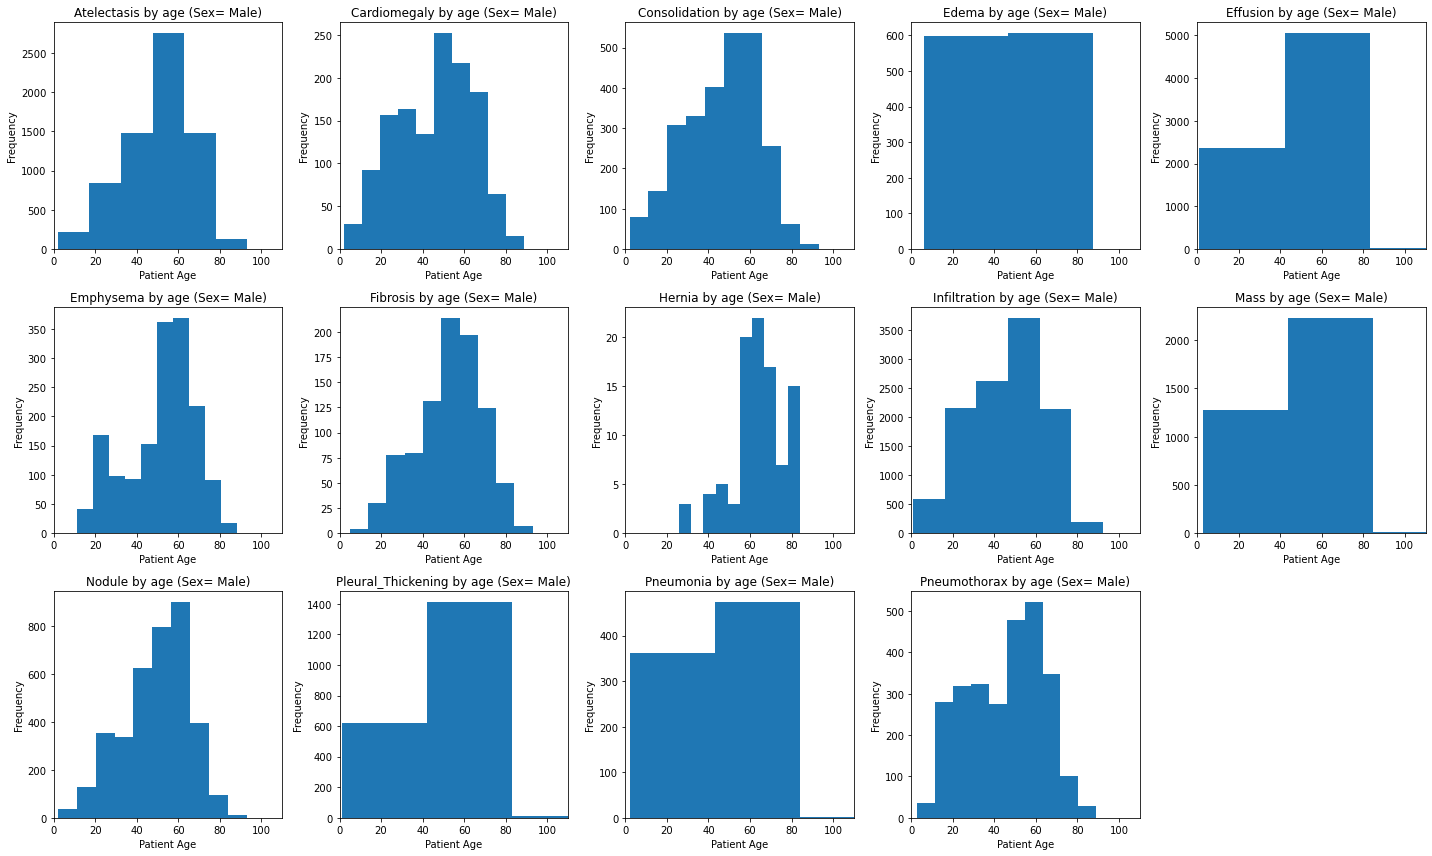

In [9]:
fig = plt.subplots(figsize=(20,12))
for i, disease in enumerate(all_diseases):
    plt.subplot(3, 5, i+1)
    plt.hist(all_xray_df[ (all_xray_df[disease]==1) & (all_xray_df['Patient Gender']=='M')]['Patient Age'])
    plt.xlabel('Patient Age')
    plt.ylabel('Frequency')
    plt.title('%s by age (Sex= Male)'%disease)
    plt.subplots_adjust(hspace=1.0)
    plt.tight_layout()
    plt.xlim(0, 110)

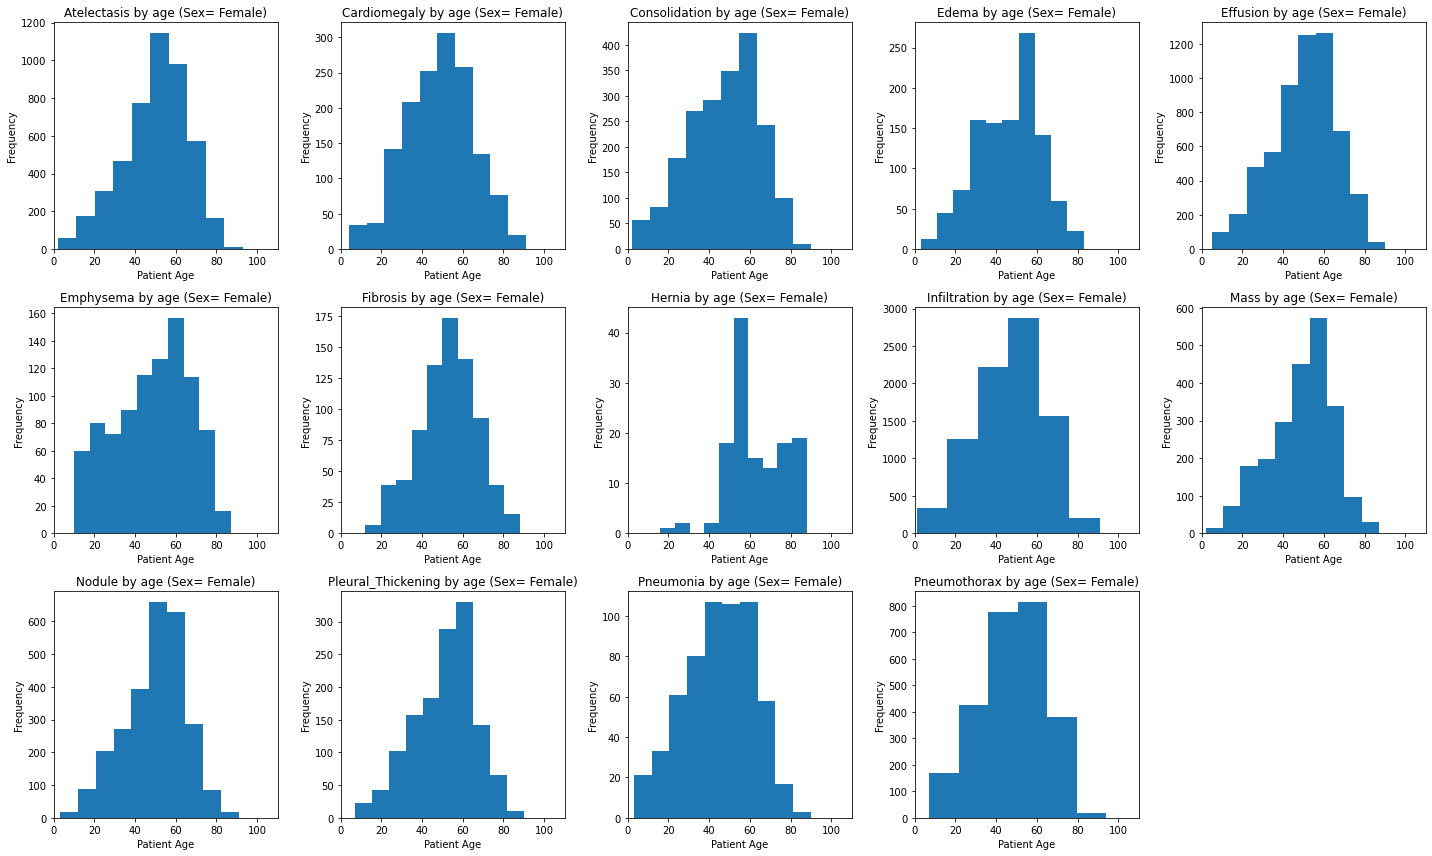

In [10]:
fig = plt.subplots(figsize=(20,12))
for i, disease in enumerate(all_diseases):
    plt.subplot(3, 5, i+1)
    plt.hist(all_xray_df[ (all_xray_df[disease]==1) & (all_xray_df['Patient Gender']=='F')]['Patient Age'])
    plt.xlabel('Patient Age')
    plt.ylabel('Frequency')
    plt.title('%s by age (Sex= Female)'%disease)
    plt.subplots_adjust(hspace=1.0)
    plt.tight_layout()
    plt.xlim(0, 110)

Different age distribution depending on the gender for pneumonia

# 2. The x-ray views taken (i.e. view position)

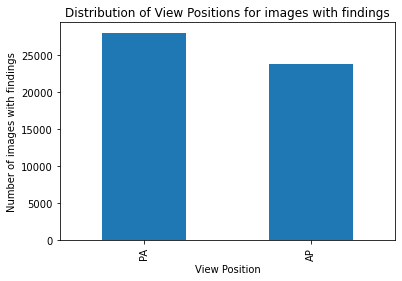

In [11]:
plt.figure()
all_xray_df[all_xray_df['Finding Labels'] != 'No Finding']['View Position'].value_counts().plot(kind='bar')
plt.title('Distribution of View Positions for images with findings')
plt.xlabel('View Position')
plt.ylabel('Number of images with findings')
plt.show()

There are more PA views acquired than AP views. 

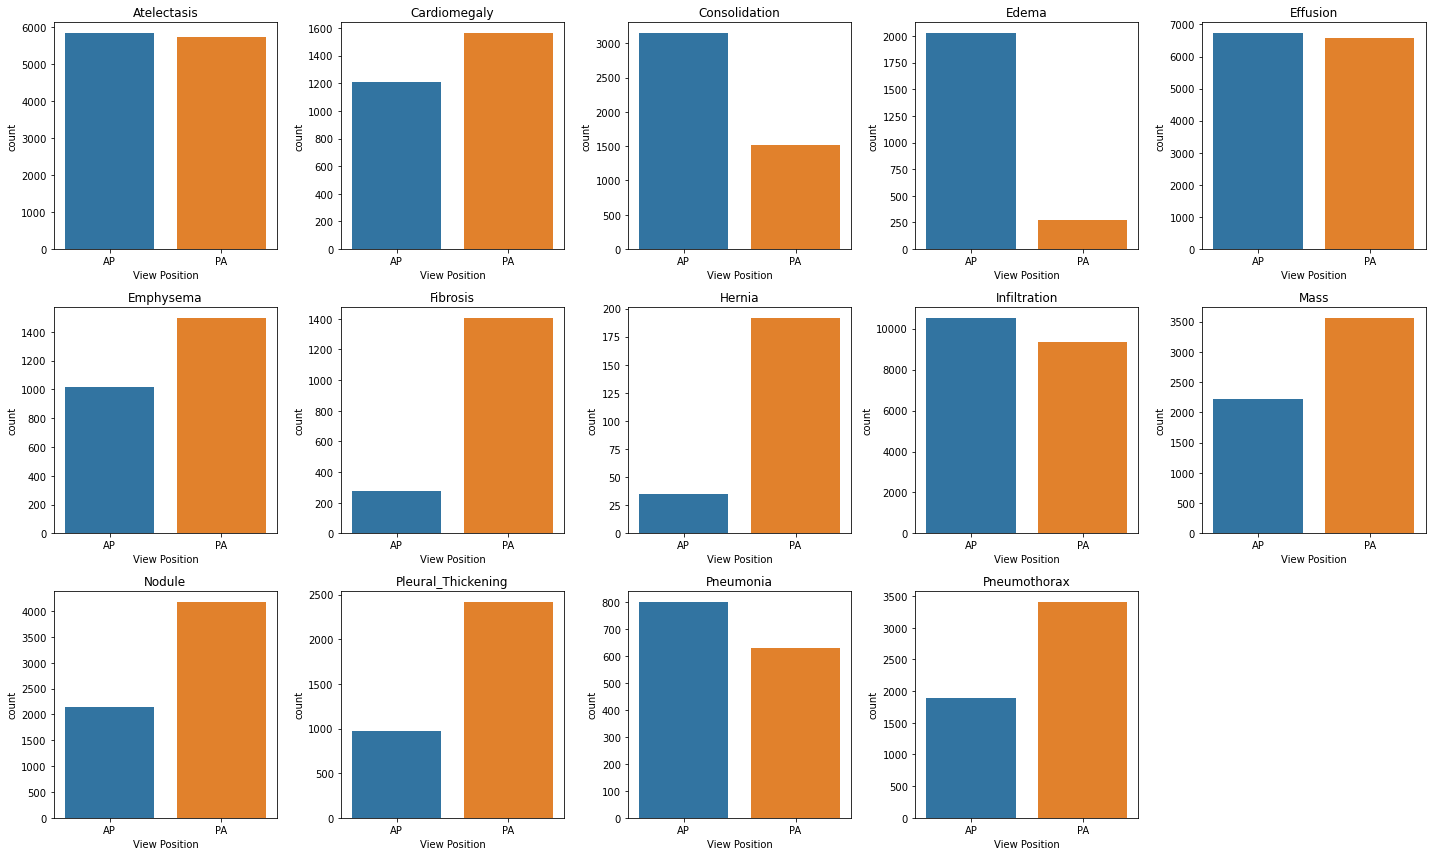

In [12]:
fig = plt.subplots(figsize = (20, 12))
for i, disease in enumerate(all_diseases):
    plt.subplot(3, 5, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax = sns.countplot(x='View Position',data = all_xray_df[all_xray_df[disease] == 1], order=['AP', 'PA'])
    plt.title(disease)
    plt.tight_layout()

# 3. The number of cases including: number of pneumonia cases,number of non-pneumonia cases

In [17]:
pneumonia_cases = all_xray_df['Pneumonia'].sum()
print('Number of pneumonia cases: %d' %(pneumonia_cases))
print('\n')

Non_Pneumonia_Cases = 0
for disease in all_diseases:
    if disease != 'Pneumonia':
        print('Number of %s cases = %d'%(disease, all_xray_df[disease].sum()))
        Non_Pneumonia_Cases += all_xray_df[disease].sum()
print('\n')
print("Total number of non-pneumonia cases = %d" %Non_Pneumonia_Cases)

no_finding = all_xray_df[all_xray_df['Finding Labels']=='No Finding'].count()[0]
print('\n')
print('Number of No Finding cases: %d' %(no_finding))


Number of pneumonia cases: 1431


Number of Atelectasis cases = 11559
Number of Cardiomegaly cases = 2776
Number of Consolidation cases = 4667
Number of Edema cases = 2303
Number of Effusion cases = 13317
Number of Emphysema cases = 2516
Number of Fibrosis cases = 1686
Number of Hernia cases = 227
Number of Infiltration cases = 19894
Number of Mass cases = 5782
Number of Nodule cases = 6331
Number of Pleural_Thickening cases = 3385
Number of Pneumothorax cases = 5302


Total number of non-pneumonia cases = 79745


Number of No Finding cases: 60361


# 4. The distribution of other diseases that are comorbid with pneumonia

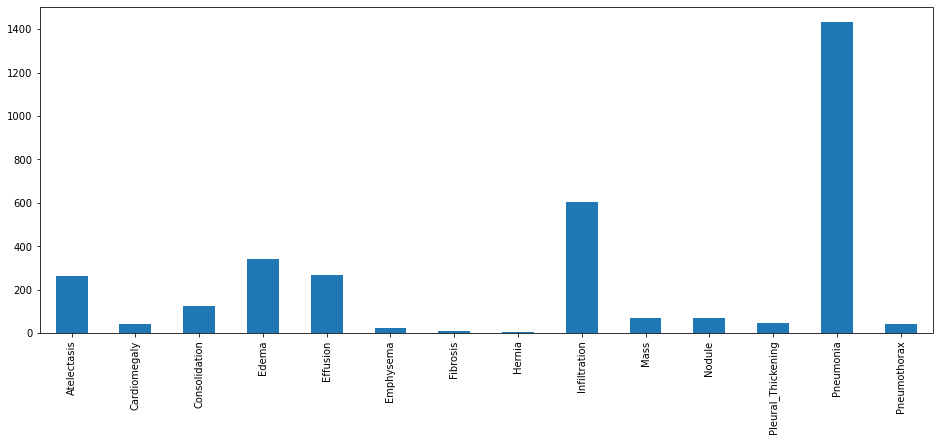

In [37]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1][all_diseases].sum().plot(kind='bar')

In [38]:
all_xray_df[all_xray_df.Pneumonia==1][all_diseases].sum()

Atelectasis            262.0
Cardiomegaly            41.0
Consolidation          123.0
Edema                  340.0
Effusion               269.0
Emphysema               23.0
Fibrosis                11.0
Hernia                   3.0
Infiltration           605.0
Mass                    71.0
Nodule                  70.0
Pleural_Thickening      48.0
Pneumonia             1431.0
Pneumothorax            41.0
dtype: float64

Infiltration, edema, effusion, atelectasis and consolidation are the top diseases cormobid with pneumonia.

# 5. Number of disease per patient

In [39]:
diseases_per_patient = all_xray_df.groupby(['Patient ID'])[all_diseases].sum()
diseases_per_patient.sample(5)

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Patient ID,,,,,,,,,,,,,,
15931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
diseases_per_patient['disease_count'] = diseases_per_patient.astype(bool).sum(axis=1)
diseases_per_patient.sample(5)

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_count
Patient ID,,,,,,,,,,,,,,,
28607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
18180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14291,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3
22034,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4


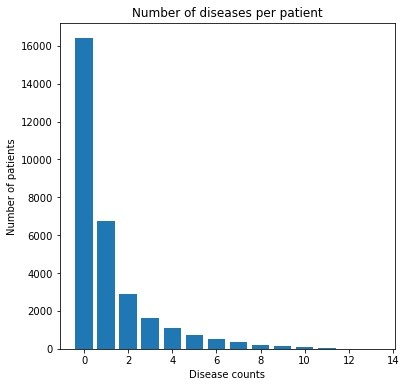

In [41]:
c = diseases_per_patient['disease_count'].unique()
num_patients = [diseases_per_patient[diseases_per_patient['disease_count']==item].count()[0] for item in c]
#count[0] to count the number of rows
plt.figure(figsize=(6,6))
plt.bar(c, num_patients)
plt.title('Number of diseases per patient')
plt.xlabel('Disease counts')
plt.ylabel('Number of patients')
plt.show()

More than 50% of the patients do not have any disease. Others have 13 different diseases co-occurring. 
Since more than 50% of the patients do not have any disease, it would be necessary to drop some of the 'No Finding' images when creating the training and validation datasets

# 6. Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases

In [42]:
all_diseases = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
for i in all_diseases:
    if len(i)>1: 
        sample_df[i] = sample_df['Finding Labels'].map(lambda finding: 1.0 if i in finding else 0)
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
3420,00016861_007.png,No Finding,7,16861,058Y,M,PA,2992,2741,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4219,00020725_019.png,Effusion|Nodule,19,20725,050Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1344,00007007_016.png,Consolidation|Pneumonia,16,7007,045Y,F,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
paths = {os.path.basename(x): x for x in 
       glob(os.path.join('/data', 'images*', '*', '*.png'))}
sample_df['path'] = sample_df['Image Index'].map(paths.get)
sample_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
1483,00007728_016.png,No Finding,16,7728,034Y,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_004/images/00007728_016.png
4598,00022962_000.png,No Finding,0,22962,021Y,F,PA,2544,3056,0.139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_010/images/00022962_000.png
3943,00019463_000.png,Atelectasis|Nodule,0,19463,058Y,M,PA,2716,2673,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,/data/images_009/images/00019463_000.png
2099,00010814_006.png,No Finding,6,10814,051Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_005/images/00010814_006.png
3366,00016601_001.png,Infiltration,1,16601,006Y,M,PA,2326,2277,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_008/images/00016601_001.png


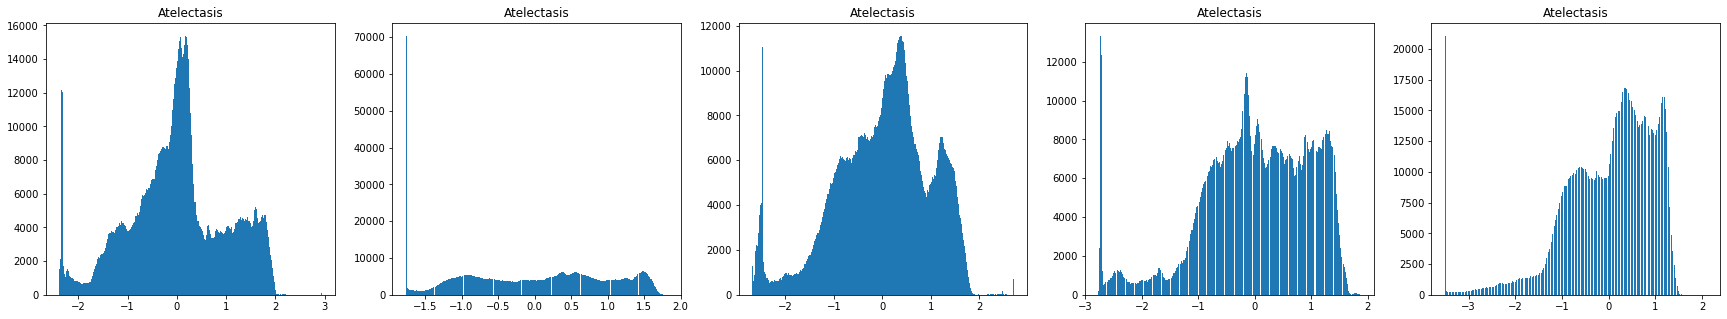

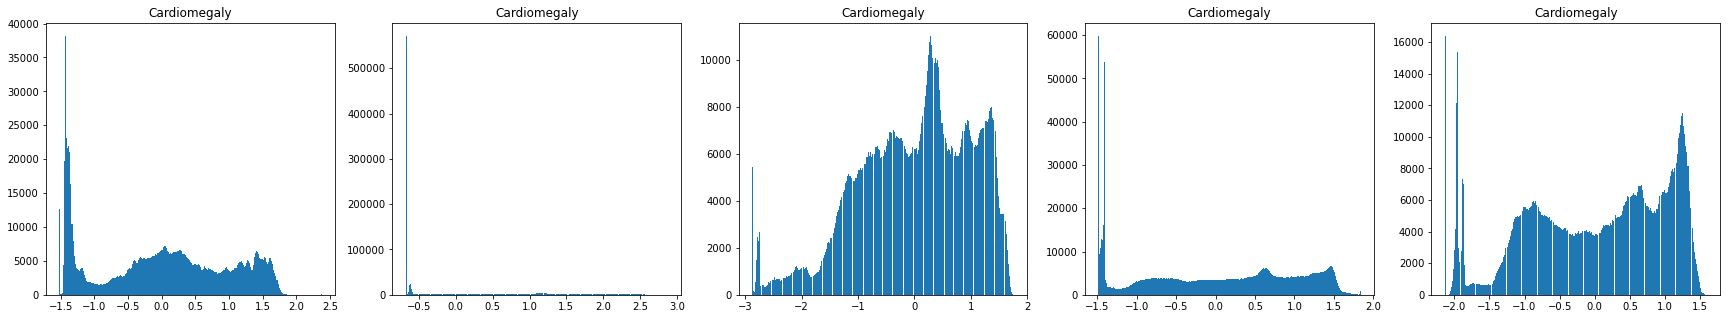

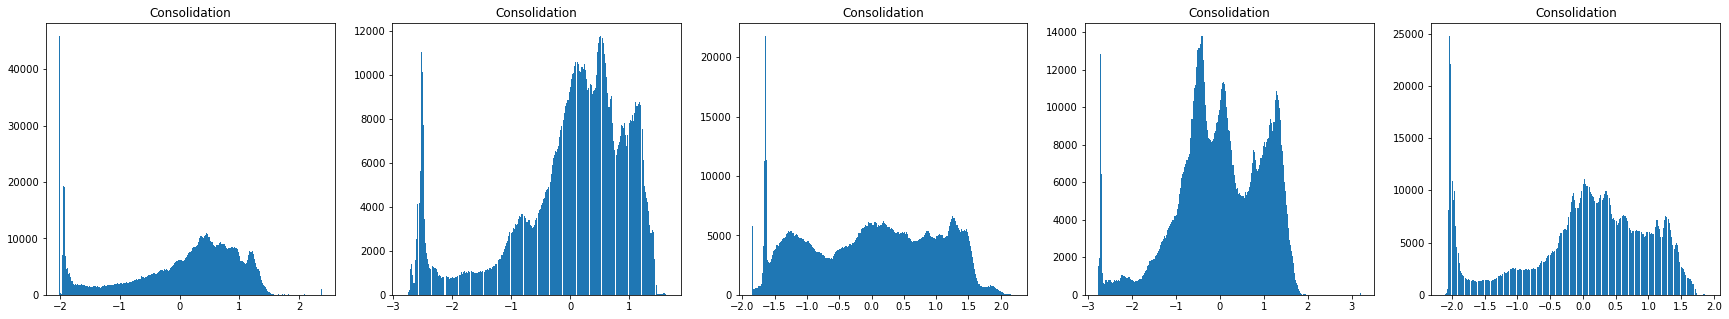

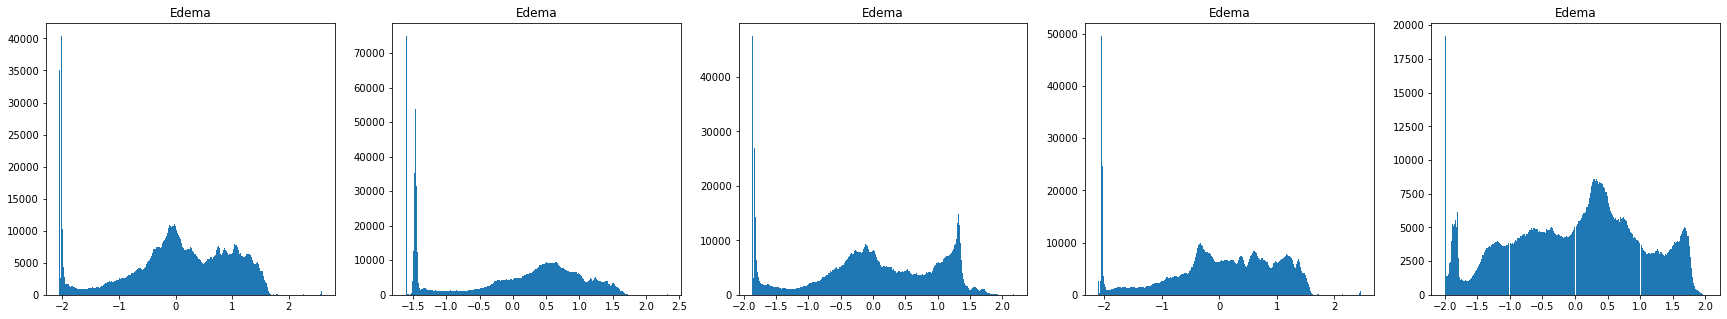

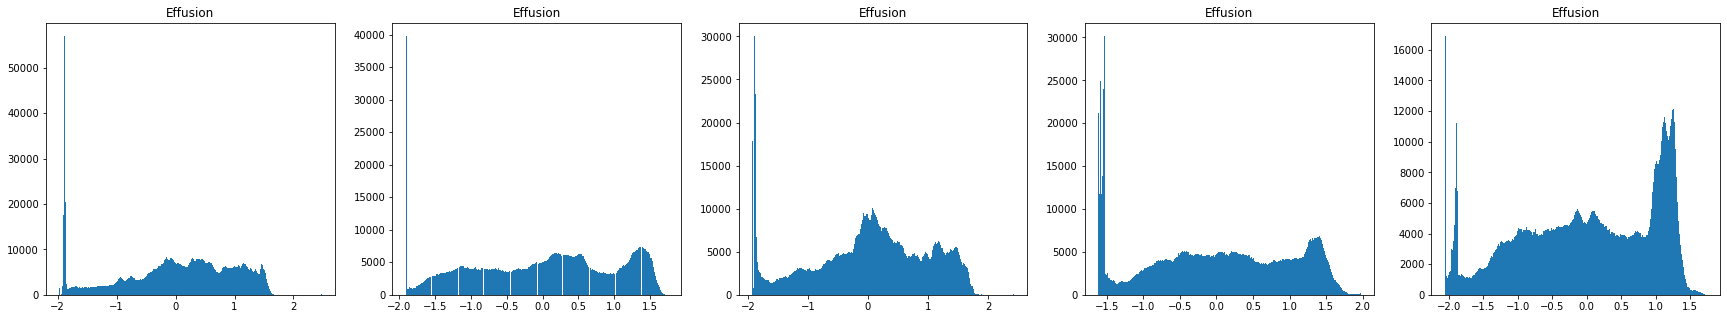

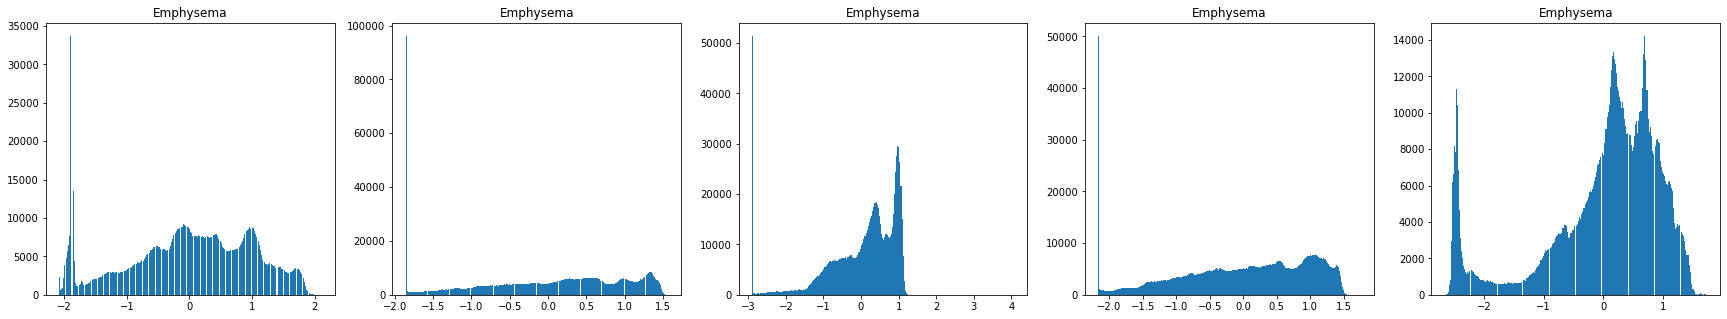

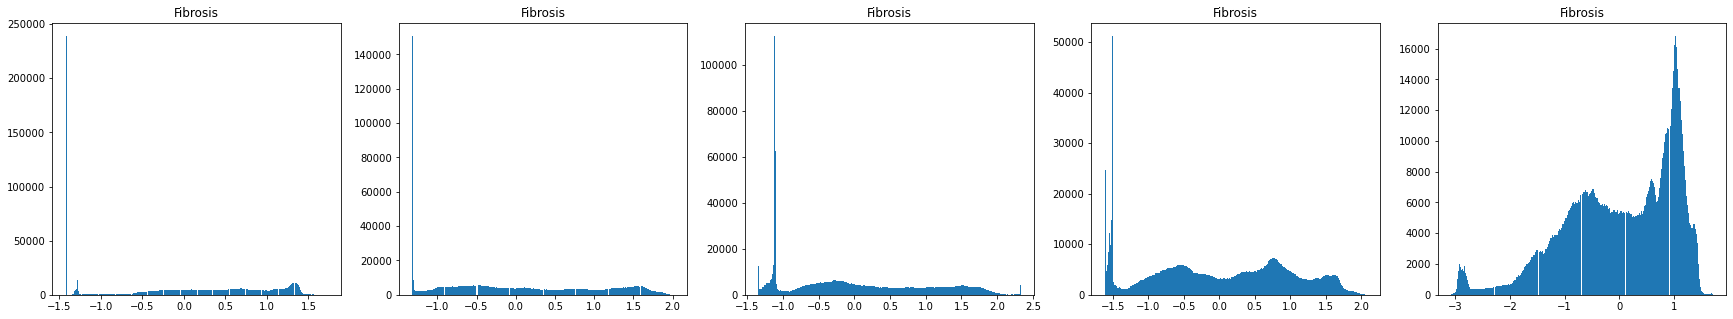

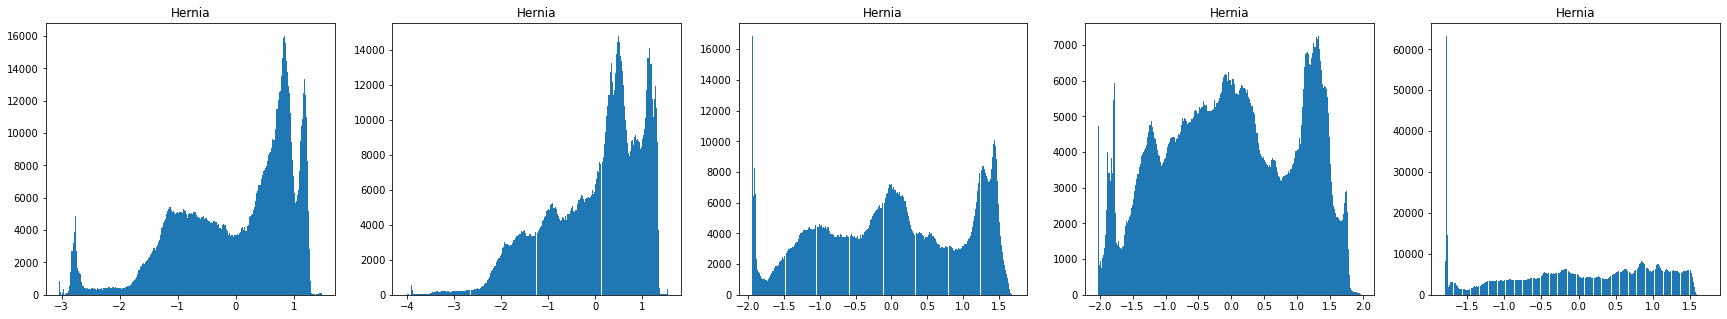

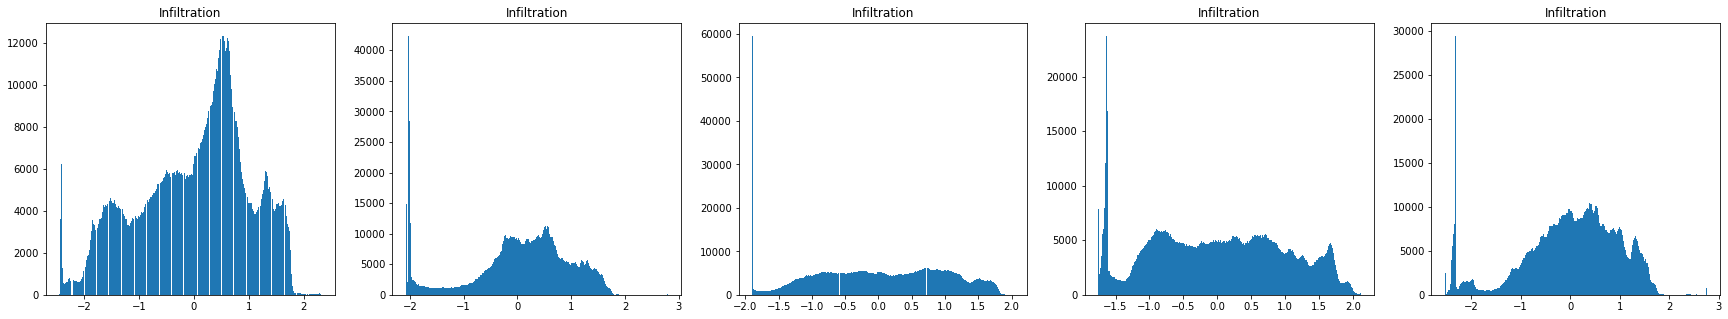

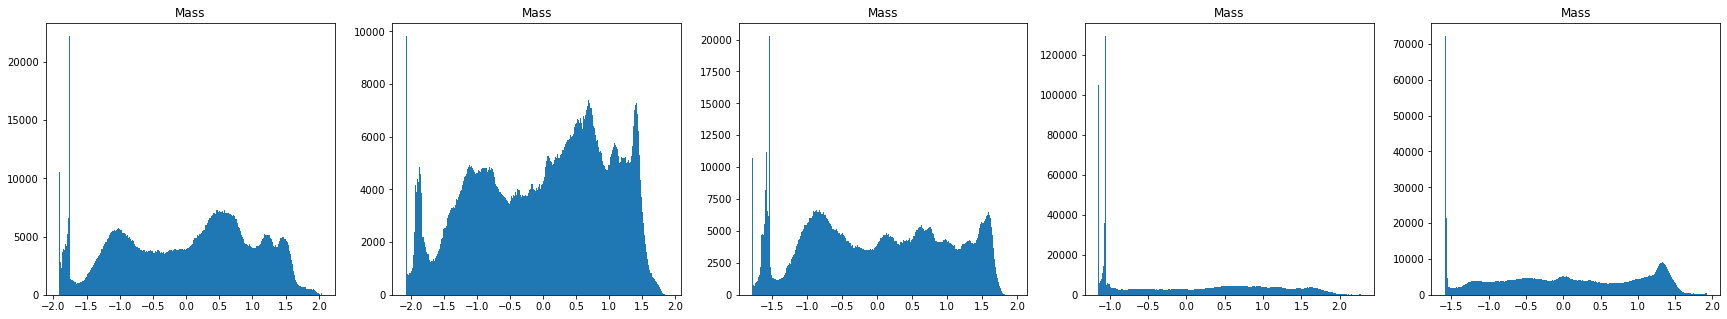

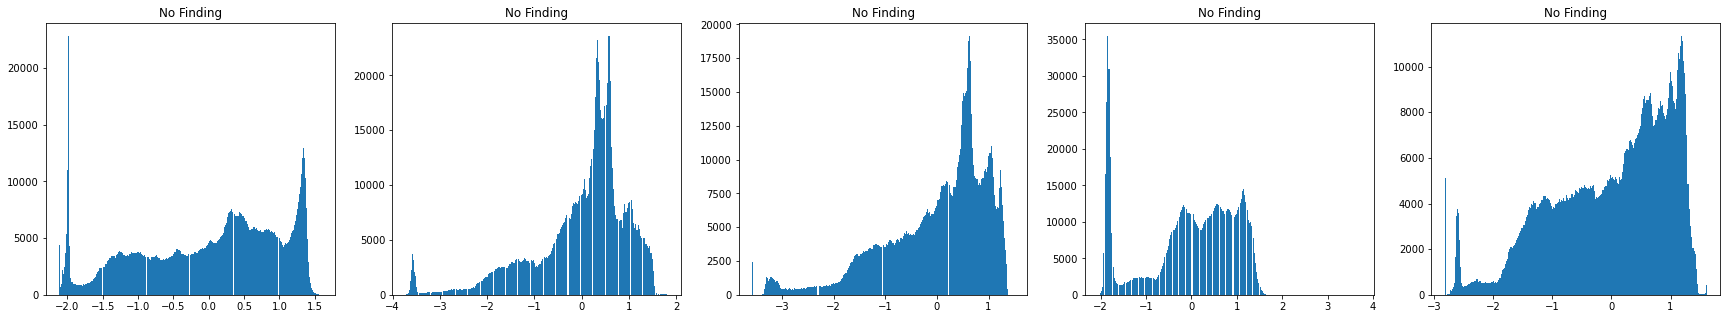

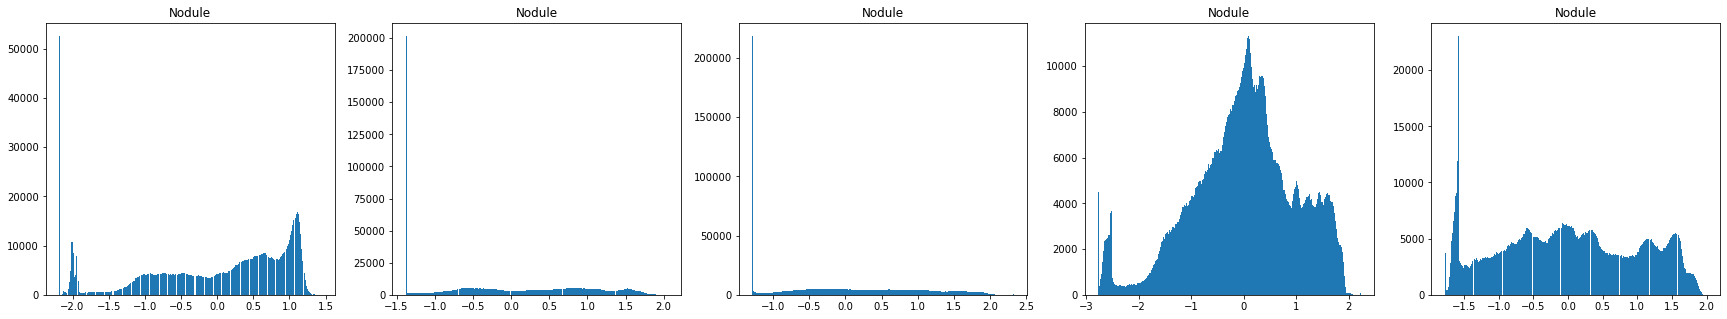

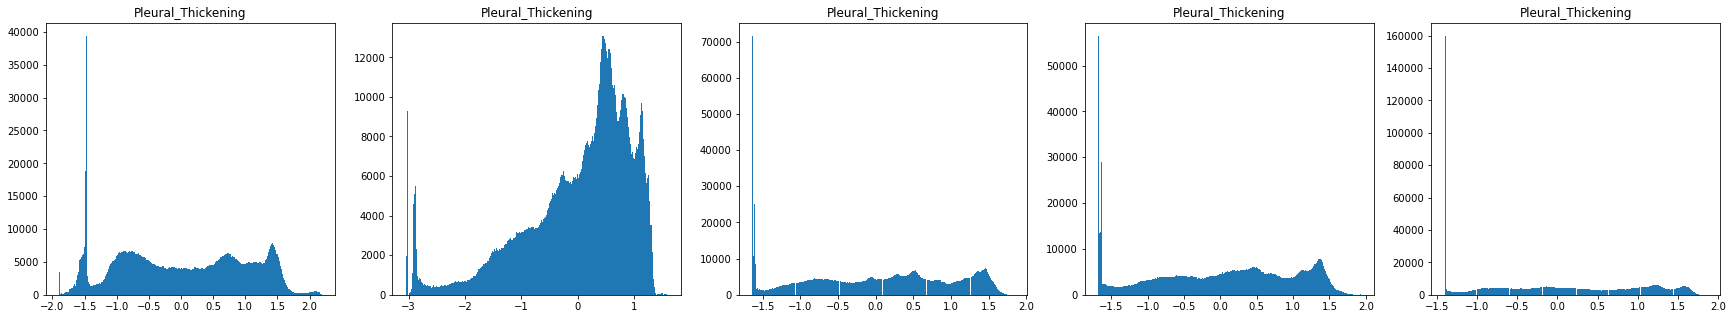

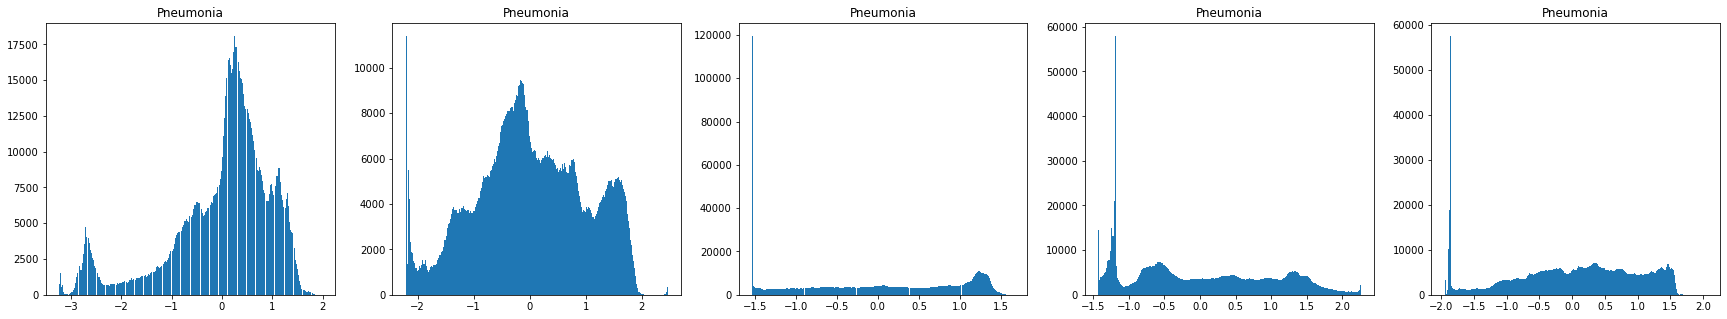

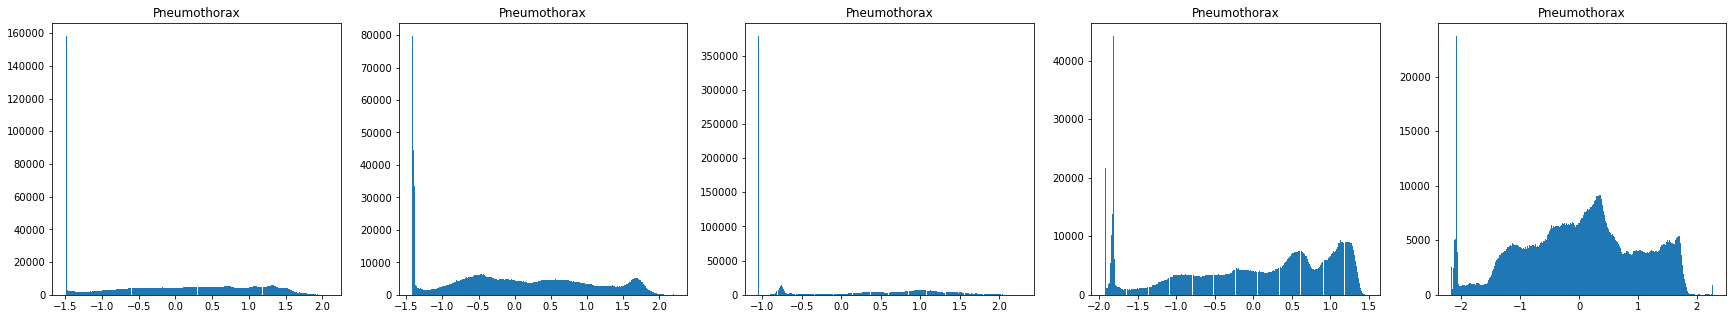

In [50]:
 for name in all_diseases:
    image_path = sample_df[sample_df["Finding Labels"] == name].sample(5, random_state=40)["path"]
    plt.figure(figsize=(30,5))
    for i in range(5):
        plt.subplot(1, 5, i+1).set_title(name)
        var = plt.imread(image_path.iloc[i])
        plt.hist(((var - np.mean(var)) / np.std(var)).ravel(), bins=256)

Edema, Consolidation and Fibrosis exhibit similar pixel-intensity distributions as pneumonia.